# Sign Language Classification Using CNN

Prepared & Presented by: Habiba Hassan 18-11594, Jaida Adel 18-06393, Yasmin Amr 18-03452

**Problem Statement**: People who suffer from mutism are unable to blend into the community. They use hand signs to communicate, hence normal people face problems trying to understand them. AI technologies can play a crucial role in breaking down these communication barriers, it can contribute significantly to their social inclusion. In the wake of this news, our team has decided to carry this project.





**Motivation**: Communication is one of the basic requirements for survival in society. Our main goal is to make these people feel included, and cared for so that they can blend into the community and show their skills.

**Data Description**: Our data consists of 24 letters of the English sign language pictures. Their pixels were set into CSV files.

In [ ]:
import os
import numpy as np #Math library
from PIL import Image #Python Imaging Library
%matplotlib inline 
import matplotlib.pyplot as plt #Data Visulaization Library
from keras.utils.np_utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator #Used for 
from keras.applications.vgg16 import preprocess_input
import tensorflow #Framework that has the standard models
from keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense,Dropout,LeakyReLU,ReLU,Conv2D, MaxPool2D,BatchNormalization
from tensorflow.keras.optimizers import Adam #Optimization Function
from sklearn.metrics import accuracy_score
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#how to load data from kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d datamunge/sign-language-mnist -p /content/dataset

 99% 62.0M/62.6M [00:00<00:00, 152MB/s] 
100% 62.6M/62.6M [00:00<00:00, 119MB/s]


In [ ]:
!unzip /content/dataset/sign-language-mnist.zip #Unzipping Data

Archive:  /content/dataset/sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
train_df = pd.read_csv("/content/sign_mnist_train/sign_mnist_train.csv")#Reading the CSV files into the colab notebook
test_df = pd.read_csv("/content/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = train_df.values
x_test = test_df.values

In [ ]:
# Normalize the data
x_train = x_train / 255 #Normalization
x_test = x_test / 255
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
# With data augmentation to prevent overfitting

#datagen = ImageDataGenerator(
#  
#        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#        zoom_range = 0.1, # Randomly zoom image 
#        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#        horizontal_flip=False,  # randomly flip images
#        vertical_flip=False)  # randomly flip images
#datagen.fit(x_train)

datagen = ImageDataGenerator(
                                       zoom_range = 0.2,
                                       vertical_flip = True , 
                                       rotation_range=10,
                                       horizontal_flip = True,
                                width_shift_range=0.1, 
                                  height_shift_range=0.1, )
datagen.fit(x_train)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) )

Epoch 1/20
215/215 [==============================] - 57s 262ms/step - loss: 2.8132 - accuracy: 0.1587 - val_loss: 2.1117 - val_accuracy: 0.3600
Epoch 2/20
215/215 [==============================] - 55s 257ms/step - loss: 2.1730 - accuracy: 0.3143 - val_loss: 1.5925 - val_accuracy: 0.5268
Epoch 3/20
215/215 [==============================] - 51s 238ms/step - loss: 1.9060 - accuracy: 0.3873 - val_loss: 1.3543 - val_accuracy: 0.5842
Epoch 4/20
215/215 [==============================] - 50s 234ms/step - loss: 1.6916 - accuracy: 0.4538 - val_loss: 1.1536 - val_accuracy: 0.6400
Epoch 5/20
215/215 [==============================] - 58s 269ms/step - loss: 1.5292 - accuracy: 0.5010 - val_loss: 1.0050 - val_accuracy: 0.6786
Epoch 6/20
215/215 [==============================] - 53s 249ms/step - loss: 1.3967 - accuracy: 0.5472 - val_loss: 0.9524 - val_accuracy: 0.6820
Epoch 7/20
215/215 [==============================] - 50s 233ms/step - loss: 1.2836 - accuracy: 0.5772 - val_loss: 0.8106 - val_ac

**Model 1 Hyper Parameters:** 

*  One Convolution Layer (Filter 3x3)
*  One Pooling Layer (Filter 2x2)
*  One Hidden Layer of 512 Neurons
*  Output Layer of 24 Neurons For 24 Letters

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

NameError: ignored

Text(0.5, 0, 'epoch')

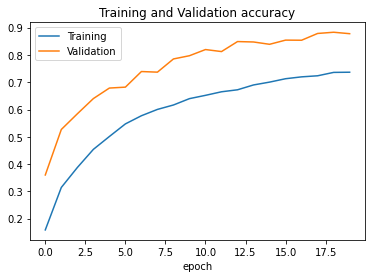

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten()) #Put data in an array form
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 25)         

**Model 2 Hyper Parameters:** 

*  Three Convolution Layers (Filter 3x3)
*  Three Pooling Layers (Filter 2x2)
*  One Hidden Layer of 512 Neurons
*  Output Layer of 24 Neurons For 24 Letters

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) )

Epoch 1/20
215/215 [==============================] - 59s 272ms/step - loss: 2.8606 - accuracy: 0.1268 - val_loss: 2.3946 - val_accuracy: 0.2639
Epoch 2/20
215/215 [==============================] - 60s 280ms/step - loss: 2.0572 - accuracy: 0.3384 - val_loss: 1.4948 - val_accuracy: 0.5481
Epoch 3/20
215/215 [==============================] - 59s 274ms/step - loss: 1.5246 - accuracy: 0.4973 - val_loss: 1.0893 - val_accuracy: 0.6638
Epoch 4/20
215/215 [==============================] - 60s 277ms/step - loss: 1.2041 - accuracy: 0.5956 - val_loss: 0.8138 - val_accuracy: 0.7474
Epoch 5/20
215/215 [==============================] - 59s 274ms/step - loss: 1.0074 - accuracy: 0.6529 - val_loss: 0.6630 - val_accuracy: 0.8067
Epoch 6/20
215/215 [==============================] - 60s 280ms/step - loss: 0.8688 - accuracy: 0.7002 - val_loss: 0.5126 - val_accuracy: 0.8366
Epoch 7/20
215/215 [==============================] - 58s 269ms/step - loss: 0.7626 - accuracy: 0.7362 - val_loss: 0.4237 - val_ac

Text(0.5, 0, 'epoch')

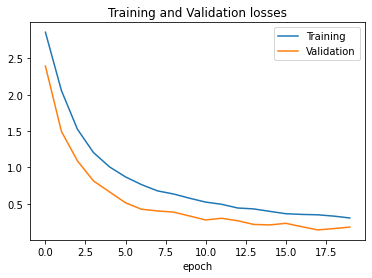

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

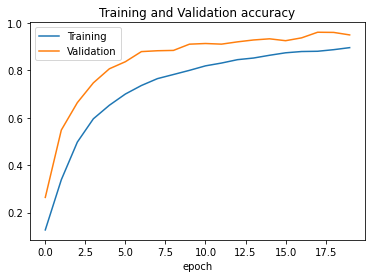

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

In [ ]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3)) #Randomly selected neurons are ignored to improve processing & time to results
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) )

Epoch 1/20
215/215 [==============================] - 95s 440ms/step - loss: 2.8870 - accuracy: 0.1179 - val_loss: 2.2111 - val_accuracy: 0.3192
Epoch 2/20
215/215 [==============================] - 98s 454ms/step - loss: 1.9178 - accuracy: 0.3628 - val_loss: 1.1837 - val_accuracy: 0.6559
Epoch 3/20
215/215 [==============================] - 94s 438ms/step - loss: 1.2942 - accuracy: 0.5522 - val_loss: 0.7824 - val_accuracy: 0.7394
Epoch 4/20
215/215 [==============================] - 94s 435ms/step - loss: 0.9838 - accuracy: 0.6525 - val_loss: 0.5940 - val_accuracy: 0.8132
Epoch 5/20
215/215 [==============================] - 95s 441ms/step - loss: 0.8114 - accuracy: 0.7139 - val_loss: 0.4966 - val_accuracy: 0.8351
Epoch 6/20
215/215 [==============================] - 91s 422ms/step - loss: 0.6869 - accuracy: 0.7580 - val_loss: 0.3666 - val_accuracy: 0.8844
Epoch 7/20
215/215 [==============================] - 89s 415ms/step - loss: 0.5904 - accuracy: 0.7888 - val_loss: 0.4127 - val_ac

**Model 3 Hyper Parameters:** 

*  Three Convolution Layers (Filter 3x3)
*  Three Pooling Layers (Filter 2x2)
*  Two Hidden Layers of 512 Neurons & 256 Neurons
*  Output Layer of 24 Neurons For 24 Letters

When you have training data, if you try to train your model too much, it might overfit, and when you get the actual test data for making predictions, it will not probably perform well. Dropout regularization is one technique used to tackle overfitting problems in deep learning.

Text(0.5, 0, 'epoch')

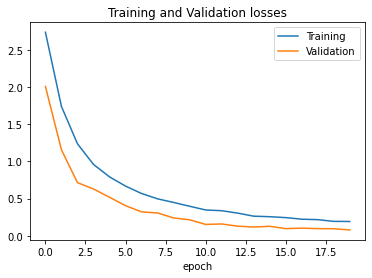

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

**Results Analysis**: As shown above, the losses curve is decreasing with every epoch which means our model is successfully learning.

Text(0.5, 0, 'epoch')

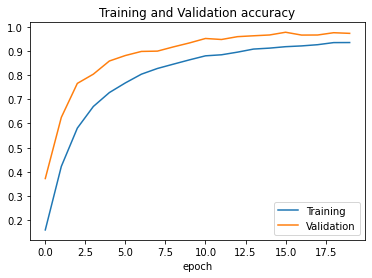

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')

**Results Analysis**: As shown above, the accuracy curve is increasing with every epoch which means our model is successfully learning.

**Comparison**: 


1.   MODEL ONE: Although the validation accuracy increased with epochs, it only reached 0.8779.
2.   MODEL TWO:Increasing the number of covolution & pooling layers has affected the validation accuracy that it jumped to 0.9497.
3.   MODEL THREE: Adding more hidden layers i.e More neurons, the validation accuracy has shown greater improvement. It rose to 0.9780.
This has proved that as the number of layers, and filters increase, also as different activation functions are put to trial with different types of data, the accuracy increases. 

**References**: 


* https://www.kaggle.com/
* https://www.tensorflow.org/tutorials/images/cnn
* https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7

